In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


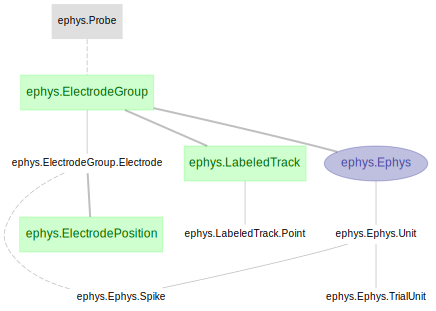

In [3]:
dj.ERD(ephys)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01


In [6]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig
123456,1,2017-10-21,daveliu,RRig


In [7]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording rig


In [8]:
ephys.Probe()

probe_part_no,probe_description
15131808323,neuropixels probe O3


In [9]:
eGroup=ephys.ElectrodeGroup()

In [10]:
eGroup.insert1((123456, 1, 1, '15131808323', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [11]:
ephys.ElectrodeGroup().make(ephys.ElectrodeGroup().fetch1(dj.key))
electrode=eGroup.Electrode()

In [12]:
eGroup

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,probe_part_no,ephys_filepath
123456,1,1,15131808323,C:\Users\liul.HHMI\Desktop\real5ap_imec3_opt3_jrc.mat


In [13]:
electrode

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,electrode sites on the electrode
123456,1,1,1
123456,1,1,2
123456,1,1,3
123456,1,1,4
123456,1,1,5
123456,1,1,6
123456,1,1,7


In [14]:
ephys1=ephys.Ephys()

In [15]:
ephys1.populate()

In [16]:
ephys1

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe
123456,1,1


In [17]:
session.Trial() & 'animal =123456'

animal Janelia ANM ID (6 digits),session session number,trial,start_time (s),end_time (s)
123456,1,0,0.1000,4.6238
123456,1,1,0.1000,4.5693
123456,1,2,0.1000,6.3794
123456,1,3,0.1000,4.5894
123456,1,4,0.1000,5.9699
123456,1,5,0.1000,6.3439
123456,1,6,0.1000,4.6021


In [18]:
spike=ephys1.Spike()

In [19]:
spike

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,unit,spike_time (s),electrode sites on the electrode,trial
123456,1,1,0,0.0001,136,18
123456,1,1,0,0.0011,64,421
123456,1,1,0,0.0016,153,288
123456,1,1,0,0.0020,153,31
123456,1,1,0,0.0021,128,72
123456,1,1,0,0.0024,101,421
123456,1,1,0,0.0031,154,331


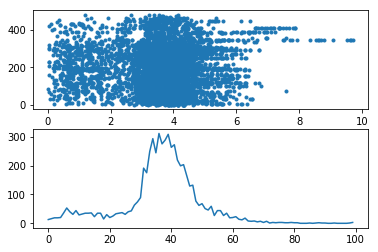

In [21]:
import numpy as np
unit1=(spike & 'unit = 24').fetch('spike_time','trial')
plt.subplot(211)
plt.plot(unit1[0],unit1[1],'.')
psth=np.histogram(np.asarray(unit1[0], dtype='float'),100)
plt.subplot(212)
psth[0]
plt.plot(psth[0])